Converged after 6 epochs.
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


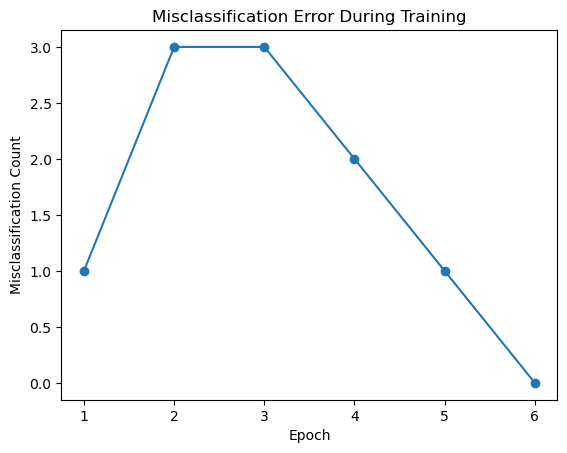

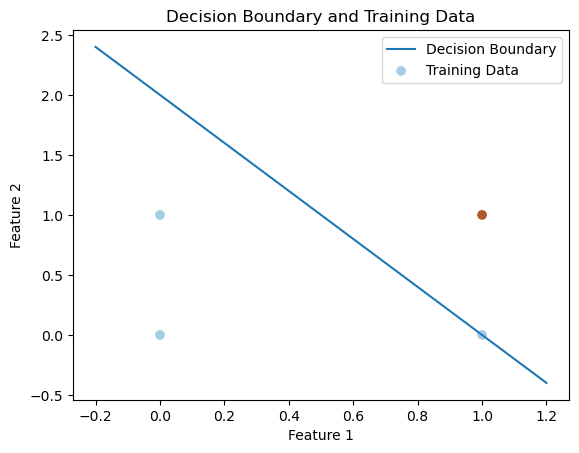

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, max_epochs=100):
        self.weights = np.zeros(input_size + 1) 
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.errors = []
    
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  
        return 1 if summation > 0 else 0
    
    def train(self, training_data, labels):
        for epoch in range(self.max_epochs):
            misclassified = False
            errors = 0
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                if prediction != label:
                    misclassified = True
                    update = self.learning_rate * (label - prediction)
                    self.weights[1:] += update * inputs
                    self.weights[0] += update
                    errors += 1
            self.errors.append(errors)
            if not misclassified:
                print(f"Converged after {epoch+1} epochs.")
                break

# Example usage
training_data = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
labels = np.array([0, 0, 0, 1])


perceptron = Perceptron(input_size=2)
perceptron.train(training_data, labels)

test_data = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

for data in test_data:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Prediction: {prediction}")

plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Misclassification Count')
plt.title('Misclassification Error During Training')
plt.show()

x_vals = np.linspace(-0.2, 1.2, 100)
y_vals = -(perceptron.weights[1] * x_vals + perceptron.weights[0]) / perceptron.weights[2]
plt.plot(x_vals, y_vals, label='Decision Boundary')
plt.scatter(training_data[:, 0], training_data[:, 1], c=labels, cmap=plt.cm.Paired, label='Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Training Data')
plt.legend()
plt.show()


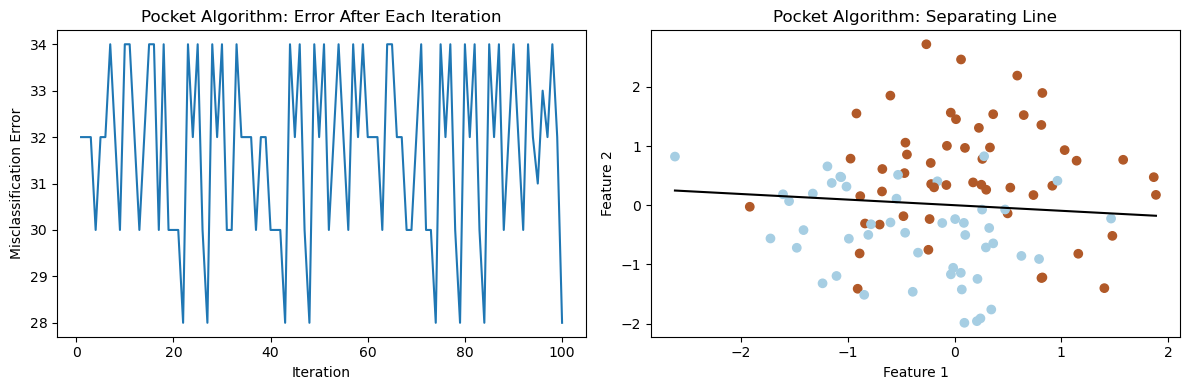

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def pocket_algorithm(X, y, max_iterations):

    num_features = X.shape[1]
    weights = np.zeros(num_features)
    best_weights = np.zeros(num_features)
    
    error_history = []

    for _ in range(max_iterations):
        misclassified = 0
        
        for i in range(X.shape[0]):
            if np.sign(np.dot(X[i], weights)) != y[i]:
                misclassified += 1
                weights += y[i] * X[i]
                
               
                if misclassified < error_history[-1] if error_history else float('inf'):
                    best_weights = weights.copy()
        
        error_history.append(misclassified)
        
    return best_weights, error_history


np.random.seed(42)
X = np.random.randn(100, 2)
y = np.sign(X[:, 0] + X[:, 1]) 

noise_indices = np.random.choice(100, 20, replace=False)
y[noise_indices] *= -1

X_with_bias = np.c_[np.ones(X.shape[0]), X]

max_iterations = 100
best_weights, error_history = pocket_algorithm(X_with_bias, y, max_iterations)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, max_iterations + 1), error_history)
plt.xlabel('Iteration')
plt.ylabel('Misclassification Error')
plt.title('Pocket Algorithm: Error After Each Iteration')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
x1_values = np.linspace(X[:, 0].min(), X[:, 0].max(), num=100)
x2_values = -(best_weights[0] + best_weights[1] * x1_values) / best_weights[2]
plt.plot(x1_values, x2_values, 'k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Pocket Algorithm: Separating Line')

plt.tight_layout()
plt.show()
